# Python for Finance

## Description
In this notebook, we will analyze a hypothethical portfolio and calculate different metrics like simple returns, daily returns, volatility etc.

## Data Source
We will retrieve our data from the Yahoo Finance API

In [5]:
# imports libraries and packages
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import seaborn as sns
from datetime import datetime

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [72]:
# get stock symbols for the portfolio >> FAANG
stock_symbols = ['FB','AMZN', 'AAPL', 'NFLX', 'GOOG']

In [73]:
# get stock starting date
stock_start_date = "2013-01-01"

In [74]:
# get today's date and format it in the form YYYY-mm-dd
today = datetime.today().strftime("%Y-%m-%d")
print(today)

2020-08-14


In [75]:
# get number of assets in portfolio
num_assets = len(stock_symbols)
print(f"You have {num_assets} assets in your portfolio")

You have 5 assets in your portfolio


In [76]:
# UDF to get stock prices (adjusted closed price) for stocks in portfolio
def getMyPortfolio(stocks=stock_symbols, start=stock_start_date, end=today, col='Adj Close'):
  data = web.DataReader(stocks, data_source='yahoo', start=start, end=end)[col]
  return data

In [77]:
# get the stock portfolio >> Adj Close Price
my_portfolio = getMyPortfolio(stock_symbols)

In [78]:
# preview dataset
my_portfolio

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,68.378807,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.515701,13.798572,360.483826
2013-01-04,28.760000,259.149994,65.635078,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.249001,14.171429,366.003143
2013-01-08,29.059999,266.380005,65.424622,13.880000,365.280823
...,...,...,...,...,...
2020-08-10,263.000000,3148.159912,450.910004,483.380005,1496.099976
2020-08-11,256.130005,3080.669922,437.500000,466.929993,1480.319946
2020-08-12,259.890015,3162.239990,452.040009,475.470001,1506.619995


In [79]:
# UDF visualize portfolio
def showGraph(stocks=stock_symbols, start=stock_start_date, end=today, col="Adj Close"):
  title = f"Portfolio {col}"
  my_portfolio = getMyPortfolio(stocks=stocks, start=start, end=end, col=col)
  plt.figure(figsize=(20, 8))

  for c in my_portfolio.columns.values:
    plt.plot(my_portfolio[c], label=c)
  
  plt.title(title)
  plt.xlabel("Date")
  plt.ylabel(f"{col} Price USD ($)")
  plt.legend(my_portfolio.columns.values)

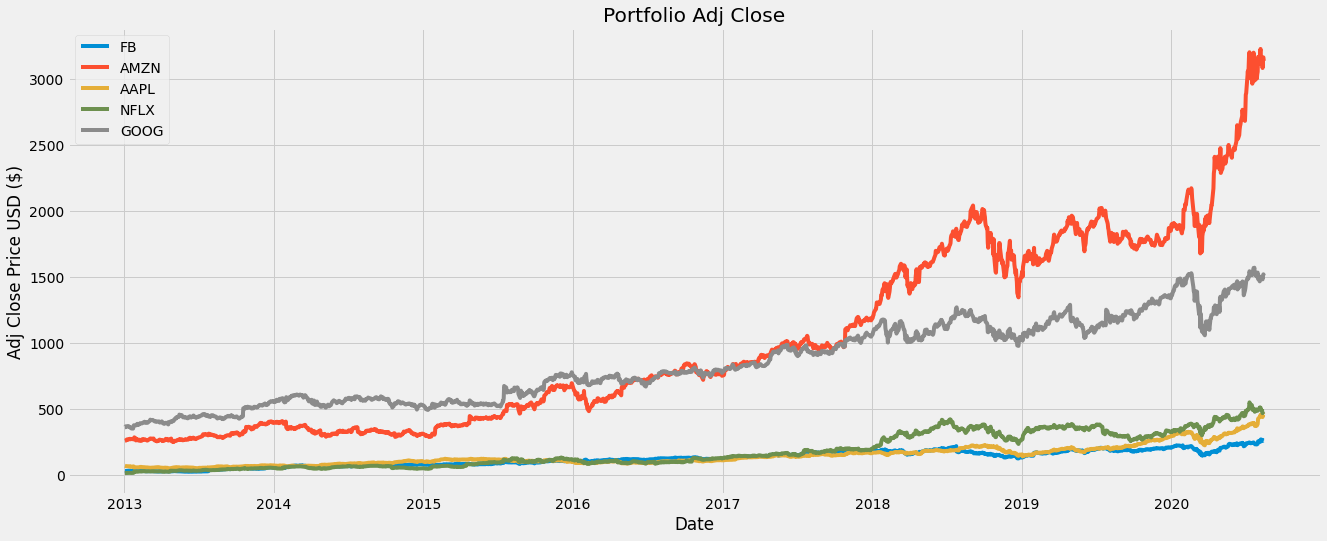

In [80]:
# show the adjusted close price for FAANG
showGraph(stock_symbols)

- All stocks have grown over the years
- Amazon saw the highest growth in the portfolio
- Facebook saw the least growth in the portfolio

## Daily Simply Returns

In [20]:
# calculate daily simple return for FB
(my_portfolio['FB'][1]/my_portfolio['FB'][0])-1

-0.008214269365583116

In [17]:
# calculate the simple returns for all stocks in portfolio
daily_simple_returns = my_portfolio.pct_change(1)

# show the daily simple returns
daily_simple_returns

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974
...,...,...,...,...,...
2020-08-10,-0.020265,-0.006093,0.014535,-0.022942,0.001077
2020-08-11,-0.026122,-0.021438,-0.029740,-0.034031,-0.010547
2020-08-12,0.014680,0.026478,0.033234,0.018290,0.017766


### Stock Correlation

Text(36.1, 0.5, 'Stocks')

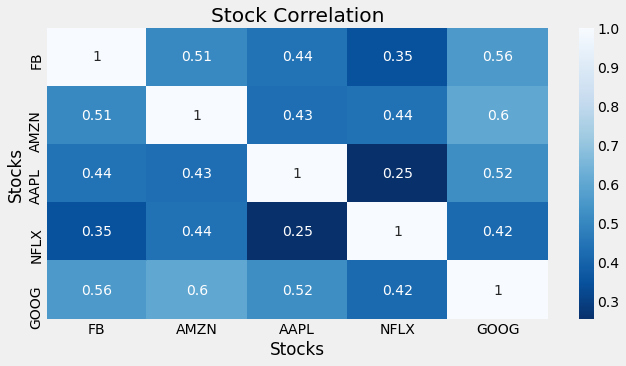

In [31]:
# calculate stock correlation
plt.figure(figsize=(10,5))
sns.heatmap(daily_simple_returns.corr(), annot=True, cmap="Blues_r")
plt.title("Stock Correlation")
plt.xlabel("Stocks")
plt.ylabel("Stocks")

- all stocks are positively correlated with each other
- Google and FB show highest positive correlation in portfolio - 0.56
- Google and Apple show the second highest positive correlation in portfolio - 0.52

### Variance and Covariance Matrix

- Variance signifies how far a distribution is from its mean
- Higher the variance, higher the risk and returns both, i.e. high volatility
- Lower the variance, lower the risk and returns

- Covariance is a very important concept in **Modern Portfolio Theory**
- **Modern Portfolion Theory** attempts to determine an efficient frontier
- **Efficient Frontier** is the set of optimal portfolios that offer the highest expected returns for a defined level of risk or a lowest risk for a given level of expected return
  - tries to optimize the maximum return for a degree of risk

In [32]:
# show the covariance matrix for simple returns
daily_simple_returns.cov()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,0.000465,0.000209,0.000169,0.000217,0.000193
AMZN,0.000209,0.000368,0.000146,0.000245,0.000185
AAPL,0.000169,0.000146,0.000310,0.000129,0.000148
NFLX,0.000217,0.000245,0.000129,0.000841,0.000194
GOOG,0.000193,0.000185,0.000148,0.000194,0.000258


- Diagonal represents Variance of a particular stock
- All other values represent covariance between two stocks

In [33]:
# show variance of each stock
daily_simple_returns.var()

Symbols
FB      0.000465
AMZN    0.000368
AAPL    0.000310
NFLX    0.000841
GOOG    0.000258
dtype: float64

### Stock Volatility
- Higher volatility => higher returns & risk
- Lower volatility => lower returns & risk

In [34]:
# standard deviation for stocks
print("Stock Volatility")
daily_simple_returns.std()

Stock Volatility


Symbols
FB      0.021569
AMZN    0.019176
AAPL    0.017609
NFLX    0.028993
GOOG    0.016049
dtype: float64

Text(0, 0.5, 'Daily Simple Returns')

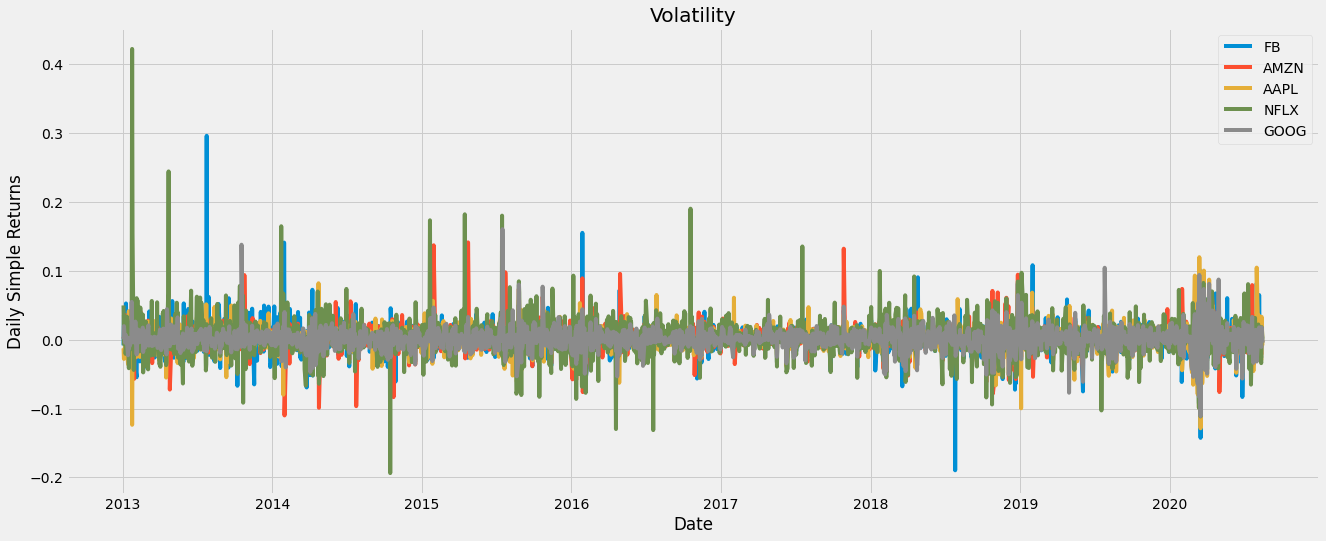

In [35]:
# visualize the stocks daily simple returns
plt.figure(figsize=(20,8))

for c in daily_simple_returns.columns.values:
  plt.plot(daily_simple_returns[c], label=c)

plt.legend()
plt.title("Volatility")
plt.xlabel("Date")
plt.ylabel("Daily Simple Returns")

- Netflix has highest volatility (standard deviation)
- Google has lowest volatility

### Expected Daily Portfolio Returns
Suppose our portfolio consists of 
- 40% FB
- 10% AMZN
- 30% AAPL
- 10% NFLX
- 10% GOOG


In [40]:
# show the mean of daily simple returns
daily_simple_returns_mean = daily_simple_returns.mean()
print("Expected daily returns for the stocks are: ")
print(daily_simple_returns_mean)

Expected daily returns for the stocks are: 
Symbols
FB      0.001392
AMZN    0.001489
AAPL    0.001145
NFLX    0.002285
GOOG    0.000876
dtype: float64


In [47]:
# create list for postfolio spread
portfolio_distribution = np.array([0.4, 0.1, 0.3, 0.1, 0.1])

# calculate daily simple return for the portfolio
expected_portfolio_daily_return = (np.sum(daily_simple_returns_mean * portfolio_distribution)*100).round(4)
print(f"Daily expected portfolio returns: {expected_portfolio_daily_return} % ")

Daily expected portfolio returns: 0.1366 % 


### Yearly Expected Portfolio Returns

In [48]:
# get yearly expected portfolio returns
print(f"Expected Annual Portfolio Returns: {expected_portfolio_daily_return*253} %")  # 253 trading days in year 2020

Expected Annual Portfolio Returns: 34.5598 %


## Growth of investment
- Returns if we had invested $1 at start date

In [50]:
# calcualte daily cumulative growth of investment
daily_cumulative_simple_return = (daily_simple_returns+1).cumprod()

daily_cumulative_simple_return

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.991786,1.004547,0.987378,1.049777,1.000581
2013-01-04,1.027143,1.007151,0.959875,1.043147,1.020353
2013-01-07,1.050714,1.043333,0.954228,1.078144,1.015900
2013-01-08,1.037857,1.035249,0.956797,1.055972,1.013896
...,...,...,...,...,...
2020-08-10,9.392857,12.234892,6.594295,36.774915,4.152666
2020-08-11,9.147500,11.972601,6.398181,35.523420,4.108866
2020-08-12,9.281786,12.289612,6.610820,36.173132,4.181866


In [54]:
# daily cumulative growth on GOOG
print((daily_simple_returns["GOOG"][1]+1) * (daily_simple_returns["GOOG"][2]+1))
print(daily_cumulative_simple_return['GOOG'][2])

1.0203525854692204
1.0203525854692204


Text(0.5, 1.0, 'Daily Cumulative Simple Returns')

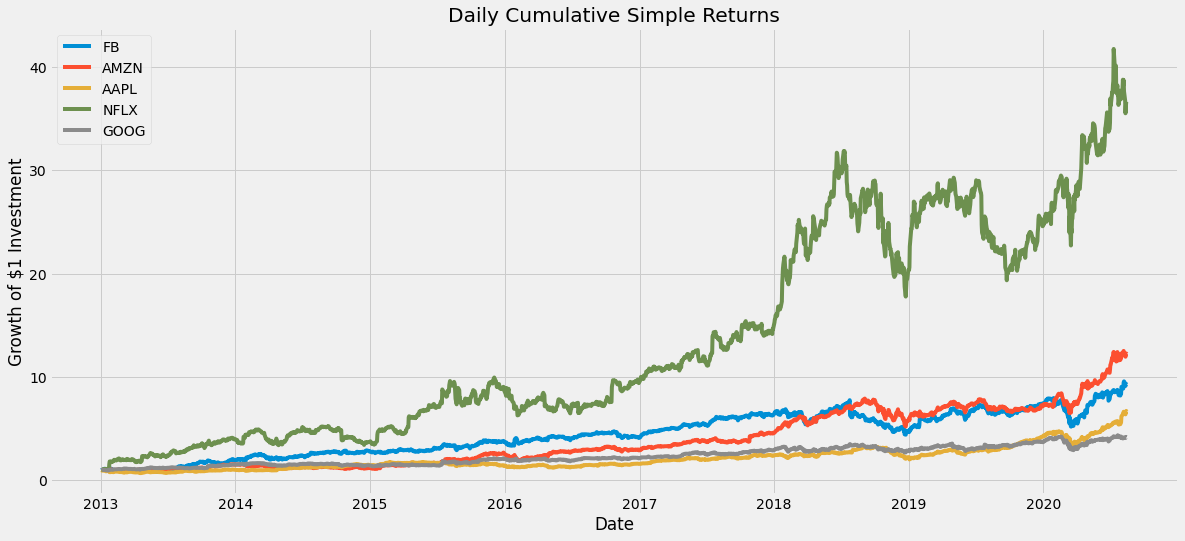

In [62]:
# visualize daily cumulative simple returns
plt.figure(figsize=(18,8))

for c in daily_cumulative_simple_return.columns.values:
  plt.plot(daily_cumulative_simple_return.index, daily_cumulative_simple_return[c], label=c)

plt.legend()
plt.xlabel("Date")
plt.ylabel("Growth of $1 Investment")
plt.title("Daily Cumulative Simple Returns")

- Highest returns with Netflix in portfolio
- Lowest returns with Netflix in Google